# Домашняя работа

## ФИО: Ваняшкин Ю.Ю.

## Группа: ИУ5-24М

## Задание
Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее трех моделей, хотя бы одна из которых должна быть ансамблевой.
Формирование обучающей и тестовой выборок на основе исходного набора данных.
Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
Подбор гиперпараметров для выбранных моделей. Рекомендуется подбирать не более 1-2 гиперпараметров. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
Формирование выводов о качестве построенных моделей на основе выбранных метрик.

## Описание данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

В качестве набора данных будем использовать датасет с прогноза поступления в университет (Admission_Predict)  
Будем решать задачу регрессии. В качестве целевого признака возьмем колонку "Шанс поступления" (Chance of Admit)

In [2]:
data=pd.read_csv("dataset.csv")

In [3]:
data.shape

(99, 12)

In [4]:
data.isna().sum()

Country                     0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
New cases                   0
New deaths                  0
New recovered               0
Deaths for 100 Cases        0
Recovered for 100 Cases     0
Deaths for 100 Recovered    0
Increase Perc               0
dtype: int64

Отсутствующих данных нет

## Разведочный анализ

In [5]:
data.head()
data.describe()
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   99 non-null     object 
 1   Confirmed                 99 non-null     int64  
 2   Deaths                    99 non-null     int64  
 3   Recovered                 99 non-null     int64  
 4   Active                    99 non-null     int64  
 5   New cases                 99 non-null     int64  
 6   New deaths                99 non-null     int64  
 7   New recovered             99 non-null     int64  
 8   Deaths for 100 Cases      99 non-null     float64
 9   Recovered for 100 Cases   99 non-null     float64
 10  Deaths for 100 Recovered  99 non-null     float64
 11  Increase Perc             99 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 9.4+ KB


Проверим корреляцию между признаками

## Корреляционный анализ, выбор подходящих признаков

In [6]:
corr = data.corr()

In [7]:
corr

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths for 100 Cases,Recovered for 100 Cases,Deaths for 100 Recovered,Increase Perc
Confirmed,1.000000,0.865028,0.971887,0.939282,0.889493,0.923002,0.856418,0.212082,-0.037661,0.015448,0.035267
Deaths,0.865028,1.000000,0.837881,0.776992,0.599005,0.662155,0.587619,0.455177,-0.050253,0.078282,0.003715
Recovered,0.971887,0.837881,1.000000,0.834241,0.839601,0.880339,0.838284,0.194864,0.067193,-0.002061,0.013075
Active,0.939282,0.776992,0.834241,1.000000,0.897759,0.912209,0.820010,0.172574,-0.180658,0.028668,0.067577
New cases,0.889493,0.599005,0.839601,0.897759,1.000000,0.979881,0.973164,0.009018,-0.079225,-0.020330,0.099514
New deaths,0.923002,0.662155,0.880339,0.912209,0.979881,1.000000,0.953548,0.056197,-0.064428,-0.012700,0.086121
New recovered,0.856418,0.587619,0.838284,0.820010,0.973164,0.953548,1.000000,0.020153,-0.020466,-0.025755,0.078874
Deaths for 100 Cases,0.212082,0.455177,0.194864,0.172574,0.009018,0.056197,0.020153,1.000000,0.007691,0.169328,-0.194568
Recovered for 100 Cases,-0.037661,-0.050253,0.067193,-0.180658,-0.079225,-0.064428,-0.020466,0.007691,1.000000,-0.319224,-0.381089
Deaths for 100 Recovered,0.015448,0.078282,-0.002061,0.028668,-0.020330,-0.012700,-0.025755,0.169328,-0.319224,1.000000,0.023151


Построим тепловую карту корреляции для более наглядного представления

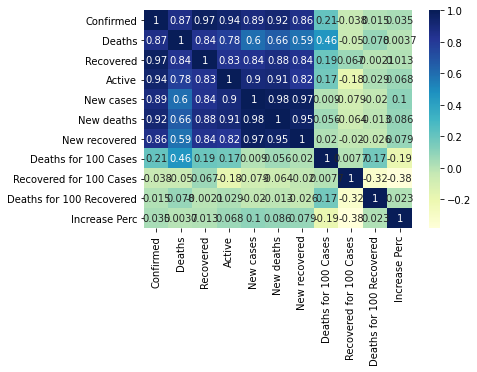

In [8]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)

Построим графики, чтобы понять структуру данных

In [9]:
data = data.drop(['Country'], axis=1)

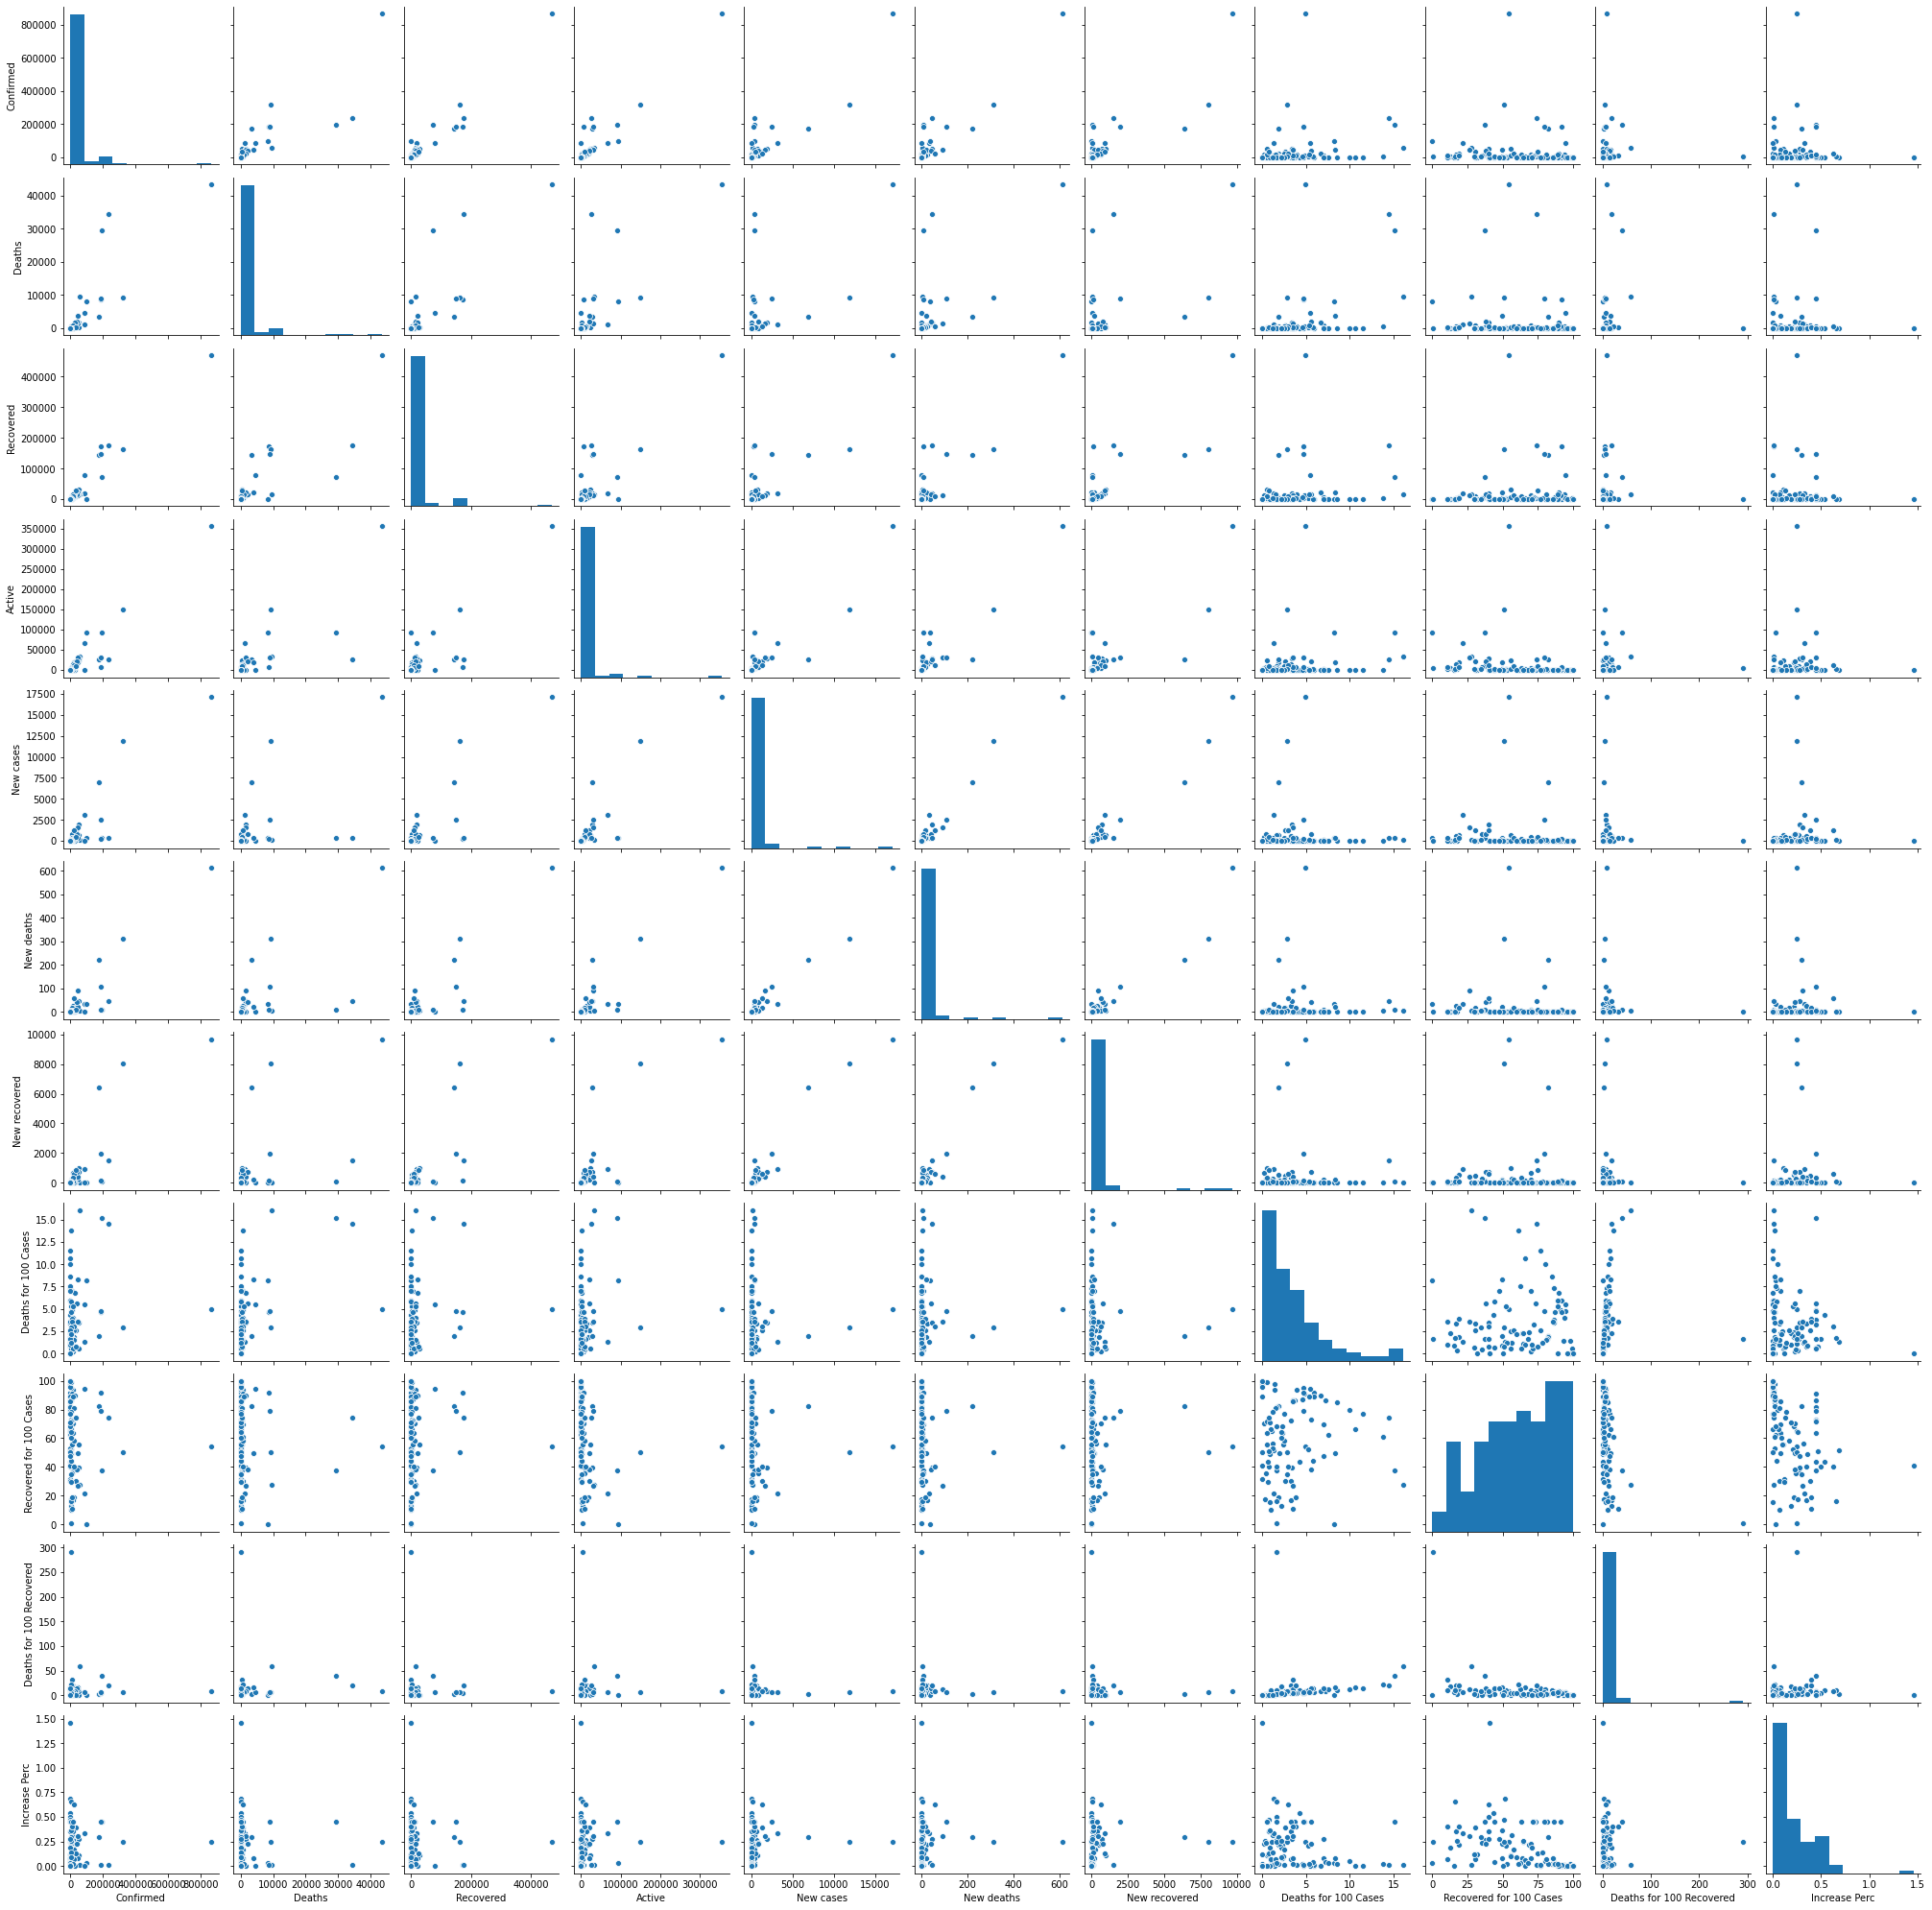

In [10]:
sns.pairplot(data)

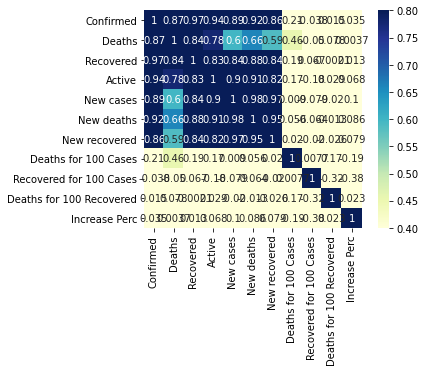

In [11]:
corr = data.corr()
sns.heatmap(corr, square=True, vmin=0.4, vmax=0.8,cmap="YlGnBu",annot=True)

Мы можем решать задачу регрессии, пытаясь предсказать шанс (%) поступления

Выделим целевой признак и нормализуем данные

In [12]:
target = data['Increase Perc']
data = data.drop(['Increase Perc'], axis=1)

In [13]:
from sklearn import preprocessing
data = preprocessing.scale(data)

## Метрики качества

В качестве метрик качества мы будет использовать среднюю квадратичную ошибку, среднюю абсолютную ошибку и коэффициент детерминации

Средняя квадратичная ошибка:   
$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert y_i - \hat{y_i} \rvert $  
где:     
$y$ - истинное значение целевого признака  
$\hat{y}$ - предсказанное значение целевого признака  
$N$ - размер тестовой выборки   
Чем ближе значение к нулю, тем лучше качество регрессии.   
Основная проблема метрики состоит в том, что она не нормирована.  

Средняя абсолютная ошибка:   
$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $   
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки   


Коэффициент детерминации:   
$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $    
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки    
$\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $    

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

## Формирование обучающей и тестовой выборки

В качестве моделей регрессии выберем модель BaggingRegressor, KneighborsRegressor и RandomForestRegressor

In [15]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

Разделим выборку в пропорции 1:4

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=1)

In [17]:
X_train.shape, y_train.shape

((79, 10), (79,))

In [18]:
X_test.shape, y_test.shape

((20, 10), (20,))

## Подбор гиперпараметров моделей

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

### Подбор гиперпараметров для модели BaggingRegressor

In [20]:
param_grid = {
    'n_estimators' : [1, 3, 6, 9, 12, 15, 20, 25],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'max_features' : [1, 2, 3, 4]
}

bagging = BaggingRegressor()
grid = GridSearchCV(estimator=bagging, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(estimator=BaggingRegressor(),
             param_grid={'max_features': [1, 2, 3, 4],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [1, 3, 6, 9, 12, 15, 20, 25]})
0.13717701651453929
BaggingRegressor(max_features=4, max_samples=0.5, n_estimators=25)


### Подбор параметров для KNeighborsRegressor

In [21]:
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)
0.1747555524096052
KNeighborsRegressor(metric='manhattan', n_neighbors=19, weights='distance')
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.0s finished


### Подбор параметров для RandomForestRegressor

In [22]:
grid_params= {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 9, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=2, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 9, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8, 10]})
0.31829918181499756
RandomForestRegressor(max_depth=9, min_samples_leaf=2, min_samples_split=4)


## Обучение с оптимальными значениями гиперпараметров

Обучение модели BaggingRegressor
Метрики качества:
Средняя квадратичная ошибка: 0.026091914312355562
Средняя абсолютная ошибка: 0.12679213333333336
Коэффициент детерминации: 0.10915653274759951
Обучение модели KNeighborsRegressor
Метрики качества:
Средняя квадратичная ошибка: 0.035208966439274965
Средняя абсолютная ошибка: 0.15094278305218792
Коэффициент детерминации: -0.2021225183268449
Обучение модели RandomForestRegressor
Метрики качества:
Средняя квадратичная ошибка: 0.03228612022906949
Средняя абсолютная ошибка: 0.1448451147675935
Коэффициент детерминации: -0.10232920991052885


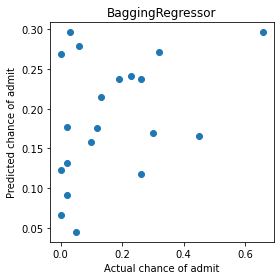

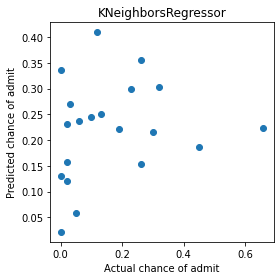

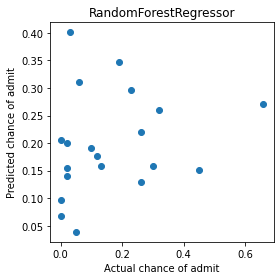

In [23]:
def quality(test, predicted):
    print("Метрики качества:")
    print("Средняя квадратичная ошибка: " + str(mean_squared_error(test, predicted)))
    print("Средняя абсолютная ошибка: " + str(mean_absolute_error(test, predicted)))
    print("Коэффициент детерминации: " + str(r2_score(test, predicted)))

models = [BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=25, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False), 
          KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance'), 
          RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
         ]

for model in models:
    print("=========================================")
    print("Обучение модели " + type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual chance of admit')
    plt.ylabel('Predicted chance of admit')
    plt.tight_layout()
    quality(y_test, predicted)

Лучшей оказалась модель случайного леса.
Оптимизация гиперпараметров не дала большого эффекта. 
Метрики качества показывают, что все модели, построенные в результате выполнения проекта, являются достаточно хорошими для их использования. При этом ансамблевые методы показали себя лучше классического алгоритма.